<a href="https://colab.research.google.com/github/Haseeb227/Ads-CTR-/blob/main/Ads_CTR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.3 MB/s 
     |████████████████████████████████| 9.9 MB 31.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import pandas as pd
from pmdarima import auto_arima

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df =   pd.read_csv("/content/google_ads.csv",
              index_col = "Day",
              parse_dates = True).asfreq("D")
df.head()   

,Unnamed: 0,clicks,impr,CTR,avg cpc,cost,conversions,CVR
Day,,,,,,,,
2017-10-18,2086.0,125.0,3396.0,0.0368,0.84,104.63,2.0,0.016
2017-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10-20,2669.0,310.0,9431.0,0.0329,0.77,239.29,0.0,0.000
2017-10-21,3350.0,459.0,15020.0,0.0306,0.75,345.90,0.0,0.000
2017-10-22,4376.0,447.0,14536.0,0.0308,0.83,372.28,0.0,0.000


In [25]:
df = df.drop('Unnamed: 0',axis=1)

In [26]:
cols = list(df.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


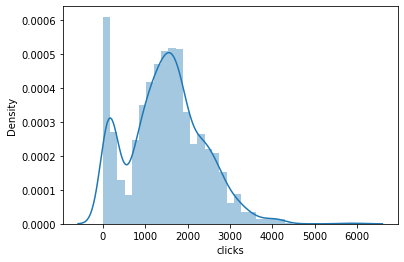

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


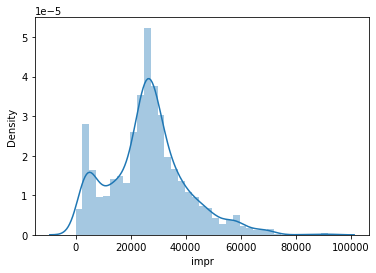

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


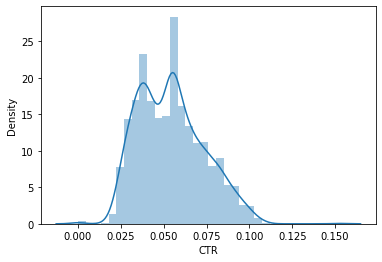

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


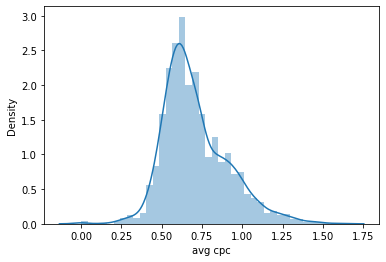

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


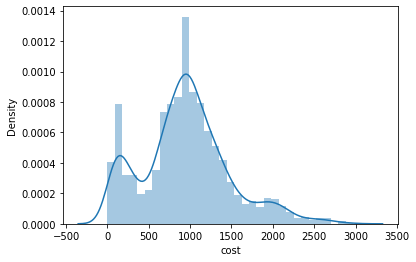

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


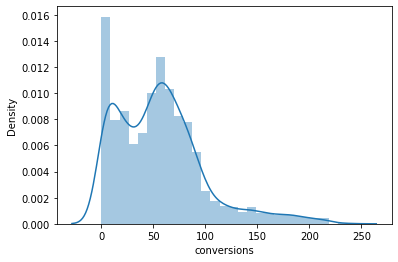

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


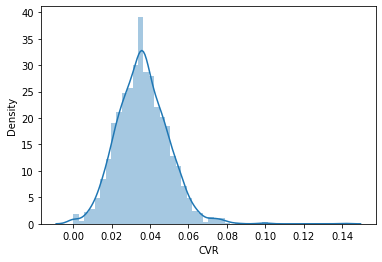

In [38]:
for i in cols:
  sns.distplot(df[i])
  plt.show()

In [32]:
df['clicks'].fillna(df['clicks'].mean(),inplace=True)

In [34]:
for i in cols:
  df[i].fillna(df[i].mean(),inplace=True)

In [35]:
for i in cols:
  print(i,' ',df[i].isnull().sum())

clicks   0
impr   0
CTR   0
avg cpc   0
cost   0
conversions   0
CVR   0


In [39]:
a = df['CTR']
b = df.drop('CTR',axis=1)

In [40]:
train = a.iloc[:1682]
test = a.iloc[1682:]

In [41]:
exo_train = b.iloc[:1682]
exo_test = b.iloc[1682:]

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
decopm_result = seasonal_decompose(df['CTR'])

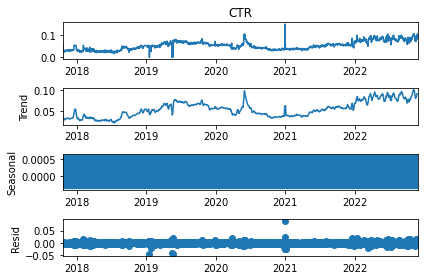

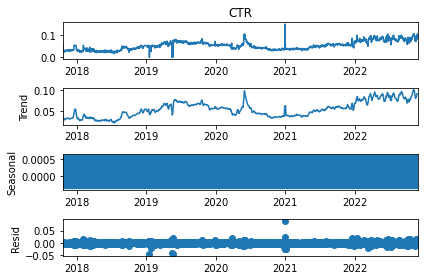

In [44]:
decopm_result.plot()

In [45]:
auto_arima(df['CTR'],exogenous=b,m=7,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=-13604.200, Time=25.86 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=-11978.402, Time=0.50 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=-13067.988, Time=4.97 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=-13032.665, Time=4.30 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=-11979.491, Time=0.39 sec
 ARIMA(2,0,2)(0,1,1)[7] intercept   : AIC=-13633.164, Time=21.85 sec
 ARIMA(2,0,2)(0,1,0)[7] intercept   : AIC=-12622.671, Time=2.18 sec
 ARIMA(2,0,2)(0,1,2)[7] intercept   : AIC=-13417.898, Time=16.49 sec
 ARIMA(2,0,2)(1,1,0)[7] intercept   : AIC=-13117.917, Time=11.01 sec
 ARIMA(2,0,2)(1,1,2)[7] intercept   : AIC=-13620.481, Time=29.08 sec
 ARIMA(1,0,2)(0,1,1)[7] intercept   : AIC=-13326.907, Time=4.79 sec
 ARIMA(2,0,1)(0,1,1)[7] intercept   : AIC=-13316.343, Time=4.35 sec
 ARIMA(3,0,2)(0,1,1)[7] intercept   : AIC=-13577.481, Time=12.29 sec
 ARIMA(2,0,3)(0,1,1)[7] intercept   : AIC=-13352.047, Time=19.70 se

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1869
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 7)   Log Likelihood                6823.582
Date:                             Tue, 29 Nov 2022   AIC                         -13633.164
Time:                                     13:51:49   BIC                         -13594.459
Sample:                                 10-18-2017   HQIC                        -13618.901
                                      - 11-29-2022                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.743e-05   1.54e-05      2.431      0.015    7.25e-06    6.76e-05
ar.L1          0.2403      0.043      5.546      0.000       0.155       0.325
ar.L2          0.5823      0.033     17.805      0.000       0.518       0.646
ma.L1          0.4314      0.045      9.650      0.000       0.344       0.519
ma.L2         -0.2842      0.013    -21.796      0.000      -0.310      -0.259
ma.S.L7       -0.9228      0.011    -86.588      0.000      -0.944      -0.902
sigma2      3.795e-05    2.8e-07    135.428      0.000    3.74e-05    3.85e-05
===================================================================================
Ljung-Box (L1) (Q):                  14.62   Jarque-Bera (JB):            411245.14
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             2.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        75.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
model = SARIMAX(train, exog = exo_train, order=(2,0,2), seasonal_order=(0,1,1,7))

In [48]:
model = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [51]:
prediction = model.predict(len(train),len(train)+len(test)-1,exog=exo_test,type='levels')

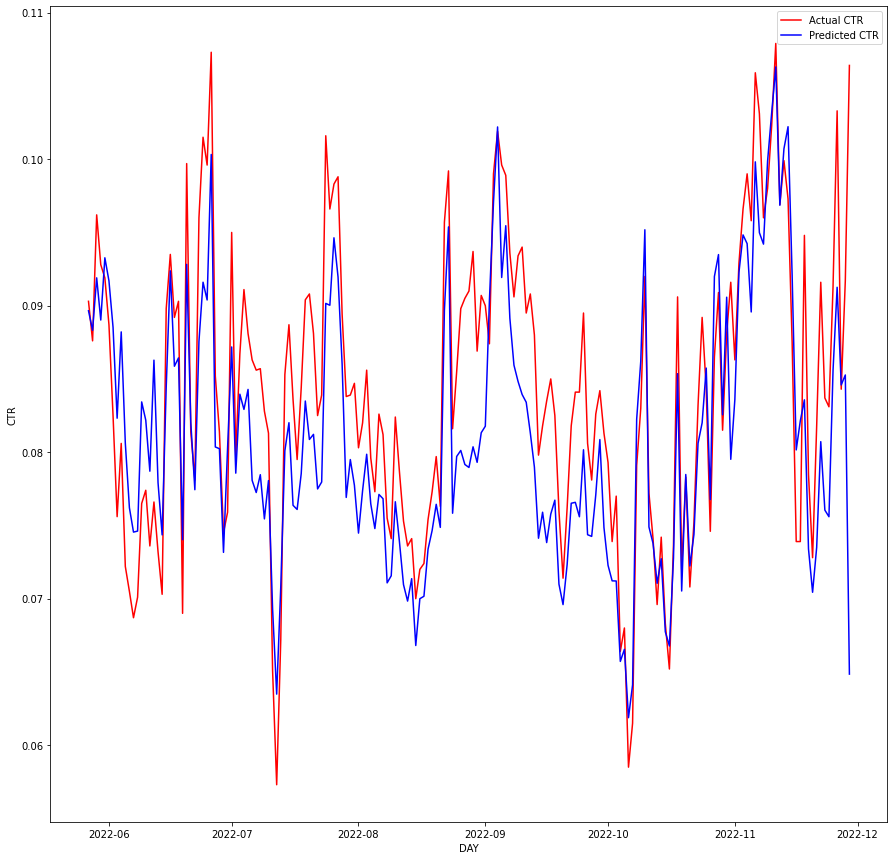

In [53]:
plt.figure(figsize=(15,15))
plt.plot(test,color='red',label='Actual CTR')
plt.plot(prediction,color='blue',label='Predicted CTR')
plt.xlabel('DAY')
plt.ylabel('CTR')
plt.legend()
plt.show()

In [63]:
import math
from sklearn.metrics import mean_absolute_percentage_error,r2_score,mean_absolute_error,mean_squared_error

In [55]:
mape = mean_absolute_percentage_error(test,prediction)

In [65]:
rmse = math.sqrt(mean_squared_error(test,prediction))
rmse

0.006499897688775152

In [66]:
mae = mean_absolute_error(test,prediction)
mae

0.005145089740314932

In [59]:
r2_score(test,prediction)

0.5834339747495637

In [57]:
print(mape*100)

6.004368392460351
